99. Recover Binary Search Tree

You are given the root of a binary search tree (BST), where the values of exactly two nodes of the tree were swapped by mistake. Recover the tree without changing its structure.

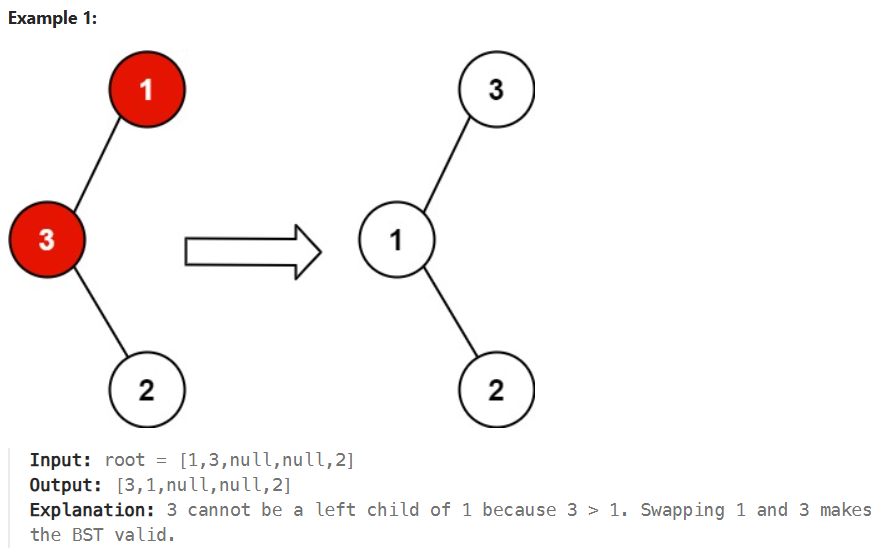

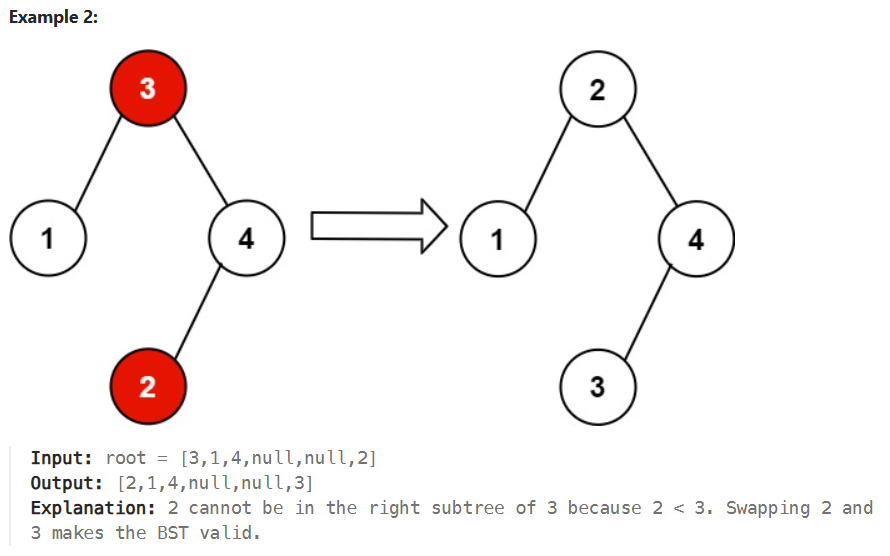

In [ ]:
class Solution(object):
    def recoverTree(self, tree):
        def help_inorder(tree, prev, violated_nodes):
            if not tree:
                return prev
                
            # recursively going to the most left node of BST (smallest)
            prev = help_inorder(tree.left, prev, violated_nodes)
            
            # save the links of the nodes in case of violation of the rules            
            if prev and prev.val > tree.val:
                if not violated_nodes[0]:
                    violated_nodes[0] = prev
                    violated_nodes[1] = tree
                else:
                    violated_nodes[1] = tree

            # update link
            prev = tree

            # recursively checking right trees
            return help_inorder(tree.right, prev, violated_nodes)


        violated_nodes = [None, None]
        help_inorder(tree, None, violated_nodes)
        
        
        violated_nodes[0].val, violated_nodes[1].val = violated_nodes[1].val, violated_nodes[0].val
            

In [ ]:
# Development

In [48]:
root = [1,3,"null","null",2]

In [49]:
# Definition of TreeNode class

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [50]:
# Helper function to build the Tree from list representation

from collections import deque

def build_tree_by_levels(list_obj):
    if len(list_obj) == 0:
        return None

    root = TreeNode(list_obj[0])
    q = deque()
    q.append(root)
    i = 1

    while q and i < len(list_obj):
        node = q.popleft()
        
        if (i < len(list_obj)) and (list_obj[i] != 'null'):
            node.left = TreeNode(list_obj[i])
            q.append(node.left)

        i += 1
        if (i < len(list_obj)) and (list_obj[i] != 'null'):
            node.right = TreeNode(list_obj[i])
            q.append(node.right)

        i += 1

    return root

            
tree = build_tree_by_levels(root) 

In [51]:
tree

In [52]:
# Helper function to show inorder traversal of BST
def inorder_traversal(tree):
    if not tree:
        return []

    return inorder_traversal(tree.left) + [tree.val] + inorder_traversal(tree.right)

In [53]:
inorder_traversal(tree)

[3, 2, 1]

In [54]:
def repair_traversal(tree):
    def help_inorder(tree, prev, violated_nodes):
        if not tree:
            return prev
            
        # recursively going to the most left node of BST (smallest)
        prev = help_inorder(tree.left, prev, violated_nodes)
        
        # save the links of the nodes in case of violation of the rules
        if prev and prev.val > tree.val:
            if not violated_nodes[0]:
                violated_nodes[0] = prev
                violated_nodes[1] = tree
            else:
                violated_nodes[1] = tree

        # update link
        prev = tree

        # recursively checking right trees
        return help_inorder(tree.right, prev, violated_nodes)


    violated_nodes = [None, None]
    help_inorder(tree, None, violated_nodes)
    
    
    violated_nodes[0].val, violated_nodes[1].val = violated_nodes[1].val, violated_nodes[0].val

    

In [55]:
# inorder traversal before repair
inorder_traversal(tree)

[3, 2, 1]

In [56]:
# repair
repair_traversal(tree)

In [57]:
# inorder traversal after repair
inorder_traversal(tree)

[3, 1, 2]